# A brief intro

A stock **option** is the right to buy or sell a stock at an agreed price and date. The two types of options used for different situations are either calls, betting a stock will increase in value, or puts, betting a stock will decrease in value. Each options contract represents 100 shares of that stock.

There are also two different styles for options: American and European. The calculations that will be done here are for **European** options, as the Black-Scholes Model is only used to price European options, because it does not take into account that American options could be exercised before the expiration date.

---

# Black-Scholes Model

In the world of finance, Black-Scholes Model, or sometimes referred as Black-Scholes-Merton(BSM) model stands out as a vital tool for pricing options. It is an equation widely used to price options contracts. It was developed through rigorous mathematical derivations in 1973 by Fischer Black, Myron Scholes and Robert Merton and earned them a Nobel prize in 1997.

<figure>
  <p align="center">
      <img src="https://finbold.com/app/uploads/2020/02/Fischer-Black-Myron-Scholes-and-Robert-Merton.jpg" alt="BlackScholesMerton" width=450>
  </p>
</figure>



### Importance
The importance of the Black-Scholes model is as follows:

- It is a prominent option pricing model.
- Traders and analysts use it to determine the fair value of a stock.
- Using this model, investors or traders can hedge their position with minimum risks.
- Options trading is an advanced form of investment and market study. The Black-Scholes method plays a key role in determining the price.
- It is the most common options trading model. The model is based on many assumptions limiting its usage outside European options trading.

The Black-Scholes model requires five essential parameters. These inputs are:

1. **Underlying Price (S)**: The current market price of the asset.
2. **Strike(Exercise) Price (K)**: The predetermined price at which the option can be exercised.
3. **Time to Expiration (T)**: The time left (in years) until the option’s expiration date.
4. **Risk Free Interest Rate (r)**: The constant rate of return on a risk-free asset, such as a government bond.
5. **Volatility (σ)**: A measure of how much the price of the underlying asset fluctuates.

The Black-Scholes model formula is as follows:

$$ \frac{∂V}{∂t}+\frac{1}{2}σ^{2}S^{s}\frac{\partial^2V}{\partial S^2} + rS\frac{\partial V}{\partial S} - rV = 0 $$

The above equation determines the stock options price over time.

The following formula computes the price of a call option **C**:

$$  C(S_t, t) = N(d_1)S_t - N(d_2)PV(K), $$ \\
$$ d_1 = \frac{\ln{\frac{S}{K}} + (r + \frac{σ^2}{2})T}{σ\sqrt{T}}, $$  \\
$$ d_2 = d_1 - σ\sqrt{T}, $$ \\
$$ PV(K) = Ke^{-rT} $$ \\

And the following formula is for computing the price of a put option **P**:

$$ P(S_t, t) = Ke^{-rT} - S_t + C(S_t, t) = N(-d_2)Ke^{-rT} - N(-d_1)S_t $$

* In this equation, N equals the cumulative distribution function of the standard normal distribution. It represents a standard normal distribution with mean = 0 and standard deviation = 1

##### Now, let's import the required modules and implement these functions

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from datetime import datetime, date
import numpy as np
import pandas as pd
from pandas import DataFrame
import yfinance
import math

sns.set()

In [11]:
def d1(S,K,T,r,sigma):
    return(math.log(S/K)+(r+sigma**2/2.)*T)/(sigma*math.sqrt(T))

def d2(S,K,T,r,sigma):
    return d1(S,K,T,r,sigma)-sigma*math.sqrt(T)

def bs_call(S,K,T,r,sigma):
    return S*norm.cdf(d1(S,K,T,r,sigma))-K*math.exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma))

def bs_put(S,K,T,r,sigma):
    return K*math.exp(-r*T)-S+bs_call(S,K,T,r,sigma)

def black_scholes(S, K, T, r, sigma, option = 'call'):
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility

    if option == 'call':
        call = S*norm.cdf(d1(S,K,T,r,sigma))-K*math.exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma))
        return call
    if option == 'put':
        put = K*math.exp(-r*T)-S+bs_call(S,K,T,r,sigma)
        return put

In [12]:
# Example
# Stock XYZ is trading for $60. The strike price is $60. Volatility is 10%, and the risk-free rate is 5%.
# What's the value of a 1-year call and put options?

print(f"Call for XYZ: ${black_scholes(60, 60, 1, 0.05, 0.1, option = 'call'):.3}")
print(f"Put for XYZ: ${black_scholes(60, 60, 1, 0.05, 0.1, option = 'put'):.3}")

Call for XYZ: $4.08
Put for XYZ: $1.16


---

# Black-Scholes Model Assumptions

The model makes certain assumptions that can lead to predictions that deviate from the real-world results. These assumptions are:
* The model assumes that risk-free rates are constant. In reality, they are dynamic—they fluctuate with supply and demand.
* The theory assumes stock returns resemble a log-normal distribution.
* It also assumes that we have a frictionless market; that there are no transaction costs, which is not the case with real-world scenarios.
* Black and Scholes neglect dividend payouts throughout the option period.


Now let's test the formula on a stock. We need to get the historical data for that specific stock and the other inputs related to the stock. We will be using Yahoo Finance and the pandas library to get this data.

In [4]:
!pip install yfinance

In [34]:
import yfinance as yf

stock = "SPY" # SPDR S&P 500 ETF Trust (SPY)

expiration_date = '2024-02-16'

ticker = yfinance.Ticker(stock)
options = ticker.option_chain(date=expiration_date)
calls = options.calls
puts = options.puts
stock_data = yfinance.download(stock)
S = stock_data.iloc[-1].Close
T = (datetime.strptime(expiration_date, '%Y-%m-%d') - datetime.now()).days/365
r = 0.05

call_c = calls.sort_values('volume', ascending=False).iloc[0]
put_c = puts.sort_values('volume', ascending=False).iloc[0]

call_stock = yfinance.download(call_c.contractSymbol)
put_stock = yfinance.download(put_c.contractSymbol)

call_vals = [S, call_c['strike'], T, r, 0.14]
put_vals = [S, put_c['strike'], T, r, 0.2]

#call_c['impliedVolatility']
#put_c['impliedVolatility']

print(f"Call for {stock}: ${black_scholes(*call_vals, option = 'call'):.3}")
print(f"Put for {stock}: ${black_scholes(*put_vals, option = 'put'):.3}")

print(f"Live Call for {stock}: ${call_c['lastPrice']:.3}")
print(f"Live Put for {stock}: ${put_c['lastPrice']:.3}")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Call for SPY: $1.82
Put for SPY: $11.8
Live Call for SPY: $1.69
Live Put for SPY: $12.2


https://finance.yahoo.com/quote/SPY/options?date=1708041600



### Limitations
- The model works only on European options, not on US options.
- The pricing of in-the-money options is accurate, but deviations are high for out-of-money options. \\
<img src="https://diggers-consulting.com/wp-content/uploads/2022/08/capture-decran-2022-08-09-a-10.31.00.png" width=400>
- The model can estimate volatility only when other factors are calculated. This reliance makes the model limiting.  
- The model assumes the same condition, irrespective of the application. For example, it assumes a frictionless market.

Also, we can find the implied volatility with iterative approach in case it's not present

In [43]:
call_vals = [S, call_c['strike'], T, r, call_c['impliedVolatility']]

def call_implied_volatility(Price, S, K, T, r):
  eps = 1e-10
  sigma = 0.001
  while sigma < 1:
      Price_implied = S * norm.cdf(d1(S, K, T, r, sigma))-K*math.exp(-r*T) * norm.cdf(d2(S, K, T, r, sigma))
      if Price-(Price_implied) < eps:
          return sigma
      sigma += 0.0001
  return "Not Found"

print(f"Found Call Implied Volatility: {100 * call_implied_volatility(black_scholes(*call_vals, option='call'), *call_vals[:-1]):.3f}%")
print(f"Real Call Implied Volatility: {100 * call_c['impliedVolatility']:.3f}%")

Found Call Implied Volatility: 3.130%
Real Call Implied Volatility: 3.126%


In [44]:
calls.corr()['strike'].sort_values(ascending=False)

<ipython-input-44-d3a1f912fdf4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  calls.corr()['strike'].sort_values(ascending=False)


strike               1.000000
impliedVolatility    0.854599
volume               0.070960
inTheMoney          -0.685770
lastPrice           -0.841228
bid                       NaN
ask                       NaN
change                    NaN
percentChange             NaN
openInterest              NaN
Name: strike, dtype: float64

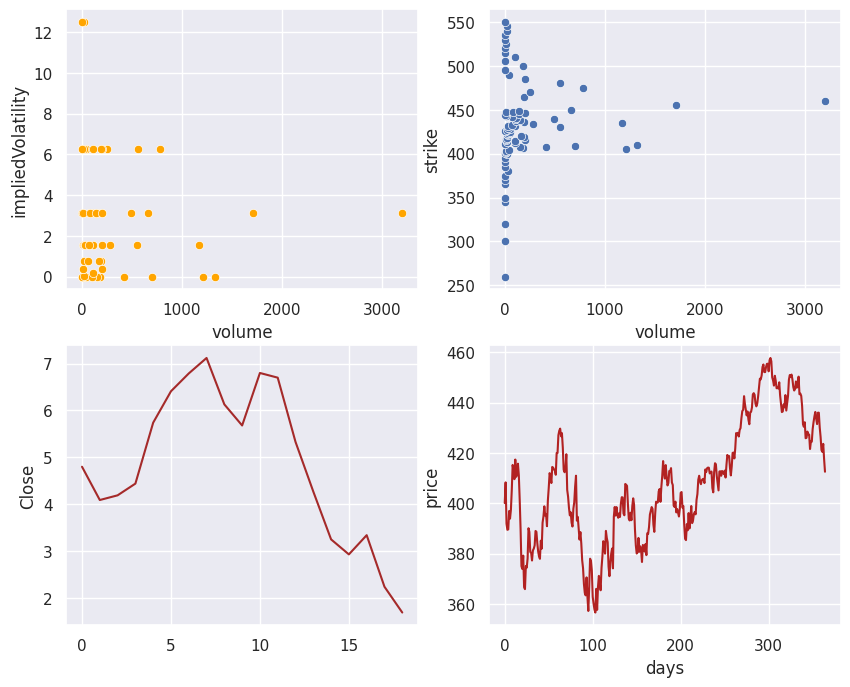

In [50]:
calls_l = []
puts_l = []

#print(calls.columns)

fig, ax = plt.subplots(2,2, figsize=(10,8))

sns.set_style("ticks")

sns.scatterplot(x=calls.volume, y=calls.impliedVolatility*100, ax=ax[0][0], color='orange')
sns.scatterplot(x=calls.volume, y=calls.strike, ax=ax[0][1])
sns.lineplot(data=call_stock, x=list(range(len(call_stock))), y='Close', ax=ax[1][0], color="brown")
sns.lineplot(data=stock_data[-365:], x=list(range(365)), y='Close', ax=ax[1][1], color='firebrick')
plt.xlabel('days')
plt.ylabel('price')

fig.show()